In [3]:
import numpy as np
import pandas as pd
import os
import matplotlib.pyplot as plt
import seaborn as sns
from transformers import BertTokenizer
from gluonnlp.data import SentencepieceTokenizer

In [2]:
!pip install mxnet

     ---------------------------------------- 33.1/33.1 MB 7.2 MB/s eta 0:00:00
     ---------------------------------------- 11.9/11.9 MB 7.2 MB/s eta 0:00:00
     ---------------------------------------- 88.7/88.7 kB 4.9 MB/s eta 0:00:00
     -------------------------------------- 133.4/133.4 kB 7.7 MB/s eta 0:00:00
     ---------------------------------------- 56.5/56.5 kB ? eta 0:00:00
     -------------------------------------- 132.3/132.3 kB 7.6 MB/s eta 0:00:00
  Attempting uninstall: urllib3
    Found existing installation: urllib3 1.26.11
    Uninstalling urllib3-1.26.11:
      Successfully uninstalled urllib3-1.26.11
  Attempting uninstall: idna
    Found existing installation: idna 3.3
    Uninstalling idna-3.3:
      Successfully uninstalled idna-3.3
  Attempting uninstall: chardet
    Found existing installation: chardet 4.0.0
    Uninstalling chardet-4.0.0:
      Successfully uninstalled chardet-4.0.0
  Attempting uninstall: requests
    Found existing installation: reque

ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
daal4py 2021.6.0 requires daal==2021.4.0, which is not installed.
spyder 5.2.2 requires pyqt5<5.13, which is not installed.
spyder 5.2.2 requires pyqtwebengine<5.13, which is not installed.
tensorflow 2.9.1 requires libclang>=13.0.0, which is not installed.
tensorflow 2.9.1 requires tensorflow-io-gcs-filesystem>=0.23.1, which is not installed.
pywavelets 1.3.0 requires numpy>=1.17.3, but you have numpy 1.16.6 which is incompatible.
anaconda-client 1.11.0 requires requests>=2.20.0, but you have requests 2.18.4 which is incompatible.
anaconda-client 1.11.0 requires urllib3>=1.26.4, but you have urllib3 1.22 which is incompatible.
anyio 3.5.0 requires idna>=2.8, but you have idna 2.6 which is incompatible.
astropy 4.3.1 requires numpy>=1.17, but you have numpy 1.16.6 which is incompatible.
botocore 1.27.28 requires u

In [5]:
DATA_IN_PATH = './data_in/KOR'
TRAIN_STS_DF = os.path.join(DATA_IN_PATH, 'KorSTS', 'sts-train.tsv')
train_data = pd.read_csv(TRAIN_STS_DF, sep='\t', quoting=3)

print("전체 train_data 개수: {}".format(len(train_data)))

전체 train_data 개수: 5749


In [6]:
train_data.head(10)

,genre,filename,year,id,score,sentence1,sentence2
0,main-captions,MSRvid,2012test,1,5.00,비행기가 이륙하고 있다.,비행기가 이륙하고 있다.
1,main-captions,MSRvid,2012test,4,3.80,한 남자가 큰 플루트를 연주하고 있다.,남자가 플루트를 연주하고 있다.
2,main-captions,MSRvid,2012test,5,3.80,한 남자가 피자에 치즈를 뿌려놓고 있다.,한 남자가 구운 피자에 치즈 조각을 뿌려놓고 있다.
3,main-captions,MSRvid,2012test,6,2.60,세 남자가 체스를 하고 있다.,두 남자가 체스를 하고 있다.
4,main-captions,MSRvid,2012test,9,4.25,한 남자가 첼로를 연주하고 있다.,자리에 앉은 남자가 첼로를 연주하고 있다.
5,main-captions,MSRvid,2012test,11,4.25,몇몇 남자들이 싸우고 있다.,두 남자가 싸우고 있다.
6,main-captions,MSRvid,2012test,12,0.50,남자가 담배를 피우고 있다.,남자가 스케이트를 타고 있다.
7,main-captions,MSRvid,2012test,13,1.60,남자가 피아노를 치고 있다.,남자가 기타를 연주하고 있다.
8,main-captions,MSRvid,2012test,14,2.20,한 남자가 기타를 치고 노래를 부르고 있다.,한 여성이 어쿠스틱 기타를 연주하고 노래를 부르고 있다.
9,main-captions,MSRvid,2012test,16,5.00,사람이 고양이를 천장에 던지고 있다.,사람이 고양이를 천장에 던진다.


In [7]:
train_set = pd.Series(train_data['sentence1'].tolist() + train_data['sentence2'].tolist()).astype(str)
train_set.head()

0             비행기가 이륙하고 있다.
1     한 남자가 큰 플루트를 연주하고 있다.
2    한 남자가 피자에 치즈를 뿌려놓고 있다.
3          세 남자가 체스를 하고 있다.
4        한 남자가 첼로를 연주하고 있다.
dtype: object

In [8]:
print("전체 문장 데이터 개수: {}".format(len(train_set)))

전체 문장 데이터 개수: 11498


In [9]:
print("유일한 총 문장 수 : {}".format(len(np.unique(train_set))))
print("반복해서 나타나는 문장 수 : {}".format(np.sum(train_set.value_counts() > 1)))

유일한 총 문장 수 : 10383
반복해서 나타나는 문장 수 : 716


Text(0, 0.5, 'Number of sentence')

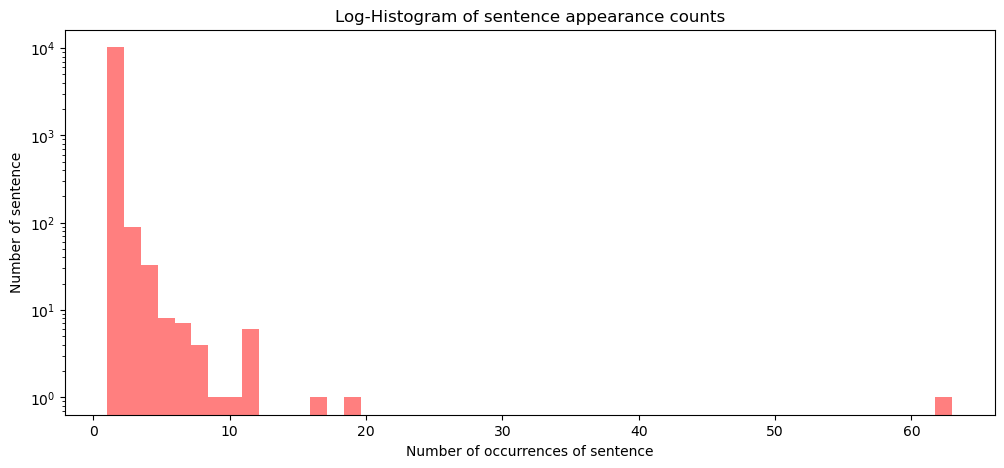

In [11]:
plt.figure(figsize=(12, 5))
plt.hist(train_set.value_counts(), bins=50, alpha=0.5, color= 'r', label='word')
plt.yscale('log', nonpositive='clip')
plt.title('Log-Histogram of sentence appearance counts')
plt.xlabel('Number of occurrences of sentence')
plt.ylabel('Number of sentence')

In [12]:
print('중복 최대 개수: {}'.format(np.max(train_set.value_counts())))
print('중복 최소 개수: {}'.format(np.min(train_set.value_counts())))
print('중복 평균 개수: {:.2f}'.format(np.mean(train_set.value_counts())))
print('중복 표준편차: {:.2f}'.format(np.std(train_set.value_counts())))
print('중복 중간길이: {}'.format(np.median(train_set.value_counts())))
# 사분위의 대한 경우는 0~100 스케일로 되어있음
print('제 1 사분위 중복: {}'.format(np.percentile(train_set.value_counts(), 25)))
print('제 3 사분위 중복: {}'.format(np.percentile(train_set.value_counts(), 75)))

중복 최대 개수: 63
중복 최소 개수: 1
중복 평균 개수: 1.11
중복 표준편차: 0.81
중복 중간길이: 1.0
제 1 사분위 중복: 1.0
제 3 사분위 중복: 1.0


{'whiskers': [<matplotlib.lines.Line2D at 0x1e886b23648>,
 'caps': [<matplotlib.lines.Line2D at 0x1e886b23fc8>,
 'boxes': [<matplotlib.lines.Line2D at 0x1e886b23848>],
 'medians': [<matplotlib.lines.Line2D at 0x1e8867e5248>],
 'fliers': [<matplotlib.lines.Line2D at 0x1e886b23e48>],
 'means': [<matplotlib.lines.Line2D at 0x1e8867e5888>]}

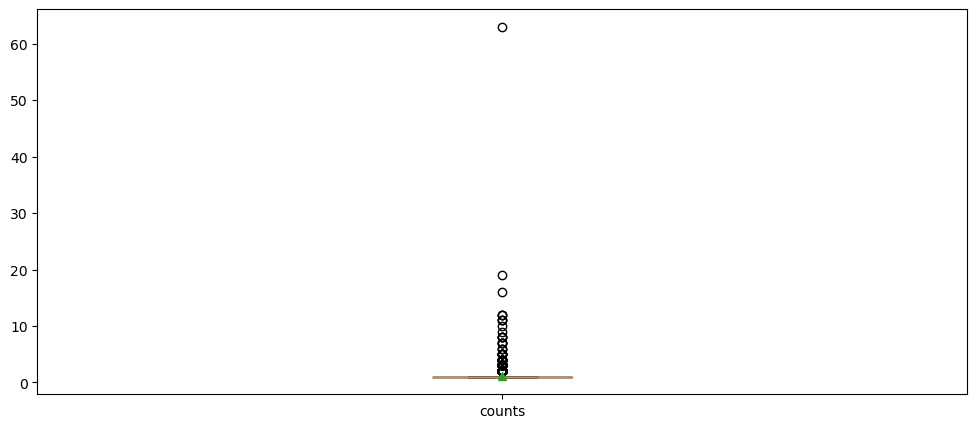

In [13]:
plt.figure(figsize=(12, 5))
plt.boxplot([train_set.value_counts()],
             labels=['counts'],
             showmeans=True)

문장 길이 최대 값: 150
문장 길이 평균 값: 29.80
문장 길이 표준편차: 16.76
문장 길이 중간 값: 25.0
문장 길이 제 1 사분위: 19.0
문장 길이 제 3 사분위: 35.0


{'whiskers': [<matplotlib.lines.Line2D at 0x1e8882321c8>,
 'caps': [<matplotlib.lines.Line2D at 0x1e888232b08>,
 'boxes': [<matplotlib.lines.Line2D at 0x1e88822f908>],
 'medians': [<matplotlib.lines.Line2D at 0x1e888238c08>],
 'fliers': [<matplotlib.lines.Line2D at 0x1e888232c08>],
 'means': [<matplotlib.lines.Line2D at 0x1e888238e48>]}

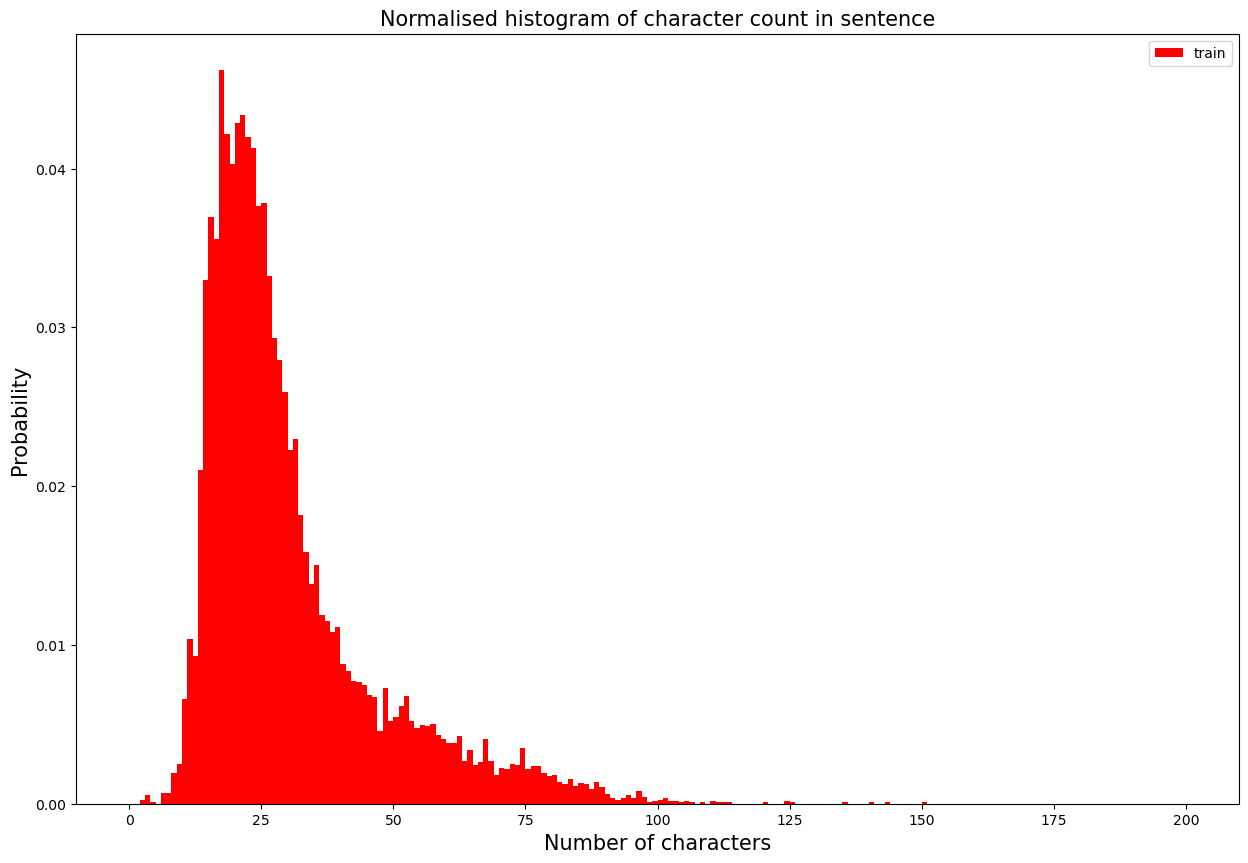

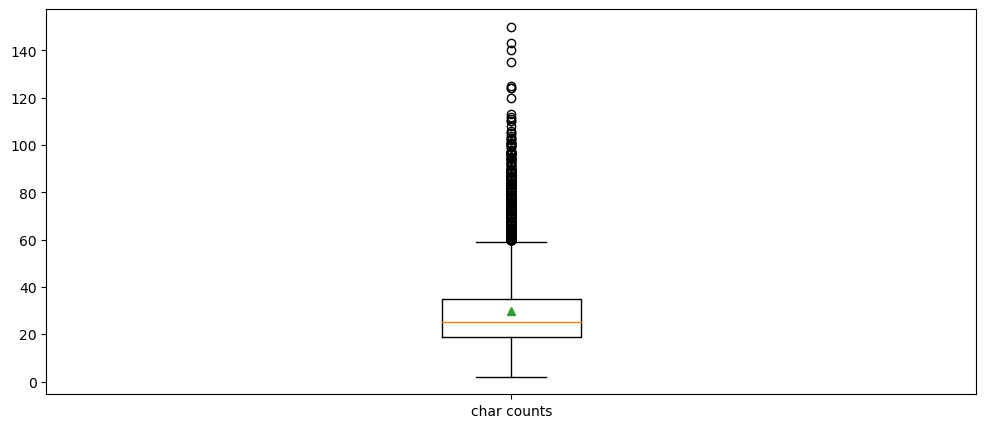

In [14]:
train_length = train_set.apply(len)

plt.figure(figsize=(15, 10))
plt.hist(train_length, bins=200, range=[0,200], facecolor='r', density=True, label='train')
plt.title("Normalised histogram of character count in sentence", fontsize=15)
plt.legend()
plt.xlabel('Number of characters', fontsize=15)
plt.ylabel('Probability', fontsize=15)


print('문장 길이 최대 값: {}'.format(np.max(train_length)))
print('문장 길이 평균 값: {:.2f}'.format(np.mean(train_length)))
print('문장 길이 표준편차: {:.2f}'.format(np.std(train_length)))
print('문장 길이 중간 값: {}'.format(np.median(train_length)))
print('문장 길이 제 1 사분위: {}'.format(np.percentile(train_length, 25)))
print('문장 길이 제 3 사분위: {}'.format(np.percentile(train_length, 75)))

plt.figure(figsize=(12, 5))
plt.boxplot(train_length,
             labels=['char counts'],
             showmeans=True)

문장 단어 개수 최대 값: 33
문장 단어 개수 평균 값: 7.50
문장 단어 개수 표준편차: 3.84
문장 단어 개수 중간 값: 6.0
문장 단어 개수 제 1 사분위: 5.0
문장 단어 개수 제 3 사분위: 9.0
문장 단어 개수 99 퍼센트: 21.0


{'whiskers': [<matplotlib.lines.Line2D at 0x1e8886e5308>,
 'caps': [<matplotlib.lines.Line2D at 0x1e8886c6d08>,
 'boxes': [<matplotlib.lines.Line2D at 0x1e8886dfcc8>],
 'medians': [<matplotlib.lines.Line2D at 0x1e8886ed5c8>],
 'fliers': [<matplotlib.lines.Line2D at 0x1e8886e5bc8>],
 'means': [<matplotlib.lines.Line2D at 0x1e8886eda88>]}

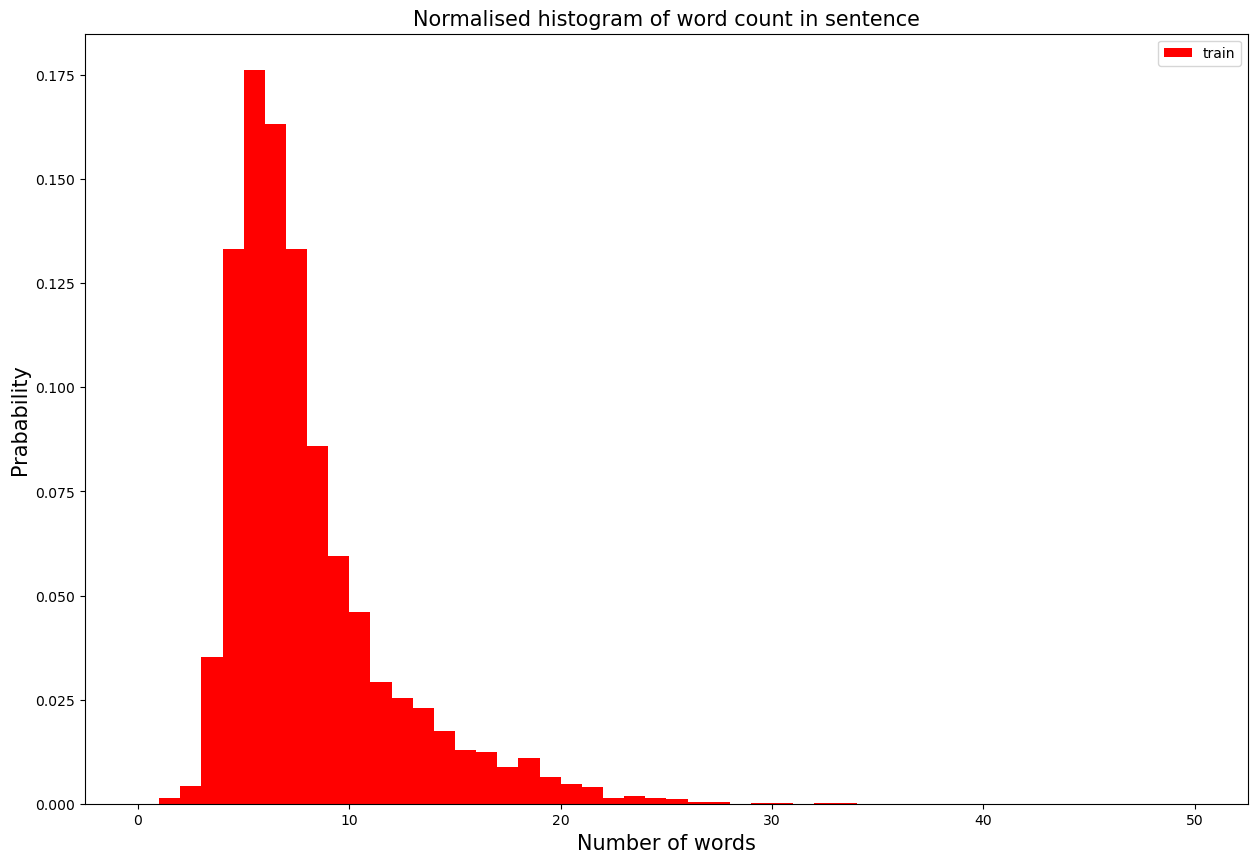

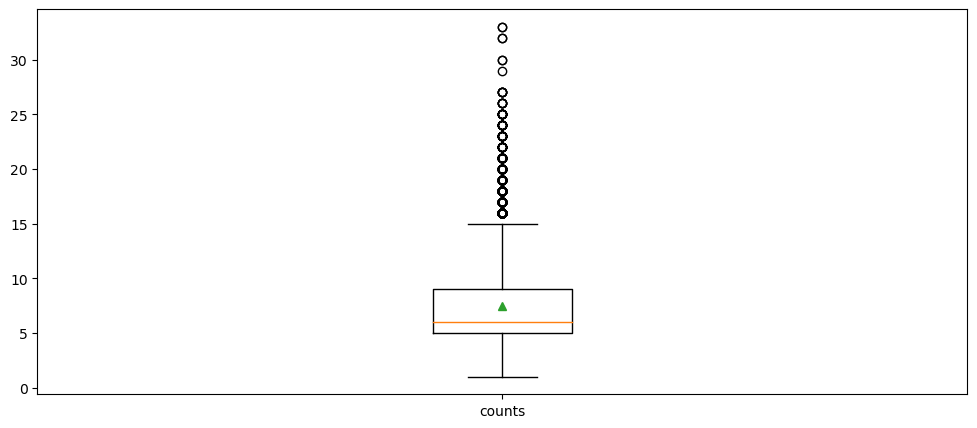

In [15]:
train_word_counts = train_set.apply(lambda x:len(x.split(' ')))

plt.figure(figsize=(15, 10))
plt.hist(train_word_counts, bins=50, range=[0, 50], facecolor='r', density=True, label='train')
plt.title('Normalised histogram of word count in sentence', fontsize=15)
plt.legend()
plt.xlabel('Number of words', fontsize=15)
plt.ylabel('Prabability', fontsize=15)

print('문장 단어 개수 최대 값: {}'.format(np.max(train_word_counts)))
print('문장 단어 개수 평균 값: {:.2f}'.format(np.mean(train_word_counts)))
print('문장 단어 개수 표준편차: {:.2f}'.format(np.std(train_word_counts)))
print('문장 단어 개수 중간 값: {}'.format(np.median(train_word_counts)))
print('문장 단어 개수 제 1 사분위: {}'.format(np.percentile(train_word_counts, 25)))
print('문장 단어 개수 제 3 사분위: {}'.format(np.percentile(train_word_counts, 75)))
print('문장 단어 개수 99 퍼센트: {}'.format(np.percentile(train_word_counts, 99)))

plt.figure(figsize=(12, 5))
plt.boxplot(train_word_counts,
             labels=['counts'],
             showmeans=True)

In [16]:
qmarks = np.mean(train_set.apply(lambda x: '?' in x)) # 물음표가 구두점으로 쓰임
math = np.mean(train_set.apply(lambda x: '[math]' in x)) # []
fullstop = np.mean(train_set.apply(lambda x: '.' in x)) # 마침표
capital_first = np.mean(train_set.apply(lambda x: x[0].isupper())) #  첫번째 대문자
capitals = np.mean(train_set.apply(lambda x: max([y.isupper() for y in x]))) # 대문자가 몇개
numbers = np.mean(train_set.apply(lambda x: max([y.isdigit() for y in x]))) # 숫자가 몇개


print('물음표가있는 문장: {:.2f}%'.format(qmarks * 100))
print('마침표를 포함한 문장: {:.2f}%'.format(fullstop * 100))
print('첫 글자가 대문자 인 문장: {:.2f}%'.format(capital_first * 100))
print('대문자가있는 문장: {:.2f}%'.format(capitals * 100))
print('숫자가있는 문장: {:.2f}%'.format(numbers * 100))

물음표가있는 문장: 1.81%
마침표를 포함한 문장: 70.13%
첫 글자가 대문자 인 문장: 1.84%
대문자가있는 문장: 5.84%
숫자가있는 문장: 19.33%


Downloading:   0%|          | 0.00/872k [00:00<?, ?B/s]

문장 tokens 개수 최대 값: 129
문장 tokens 개수 평균 값: 23.84
문장 tokens 개수 표준편차: 12.68
문장 tokens 개수 중간 값: 21.0
문장 tokens 개수 제 1 사분위: 15.0
문장 tokens 개수 제 3 사분위: 28.0
문장 tokens 개수 99 퍼센트: 67.0


{'whiskers': [<matplotlib.lines.Line2D at 0x1e888907908>,
 'caps': [<matplotlib.lines.Line2D at 0x1e88890b148>,
 'boxes': [<matplotlib.lines.Line2D at 0x1e888907048>],
 'medians': [<matplotlib.lines.Line2D at 0x1e888911208>],
 'fliers': [<matplotlib.lines.Line2D at 0x1e88890b388>],
 'means': [<matplotlib.lines.Line2D at 0x1e88890bcc8>]}

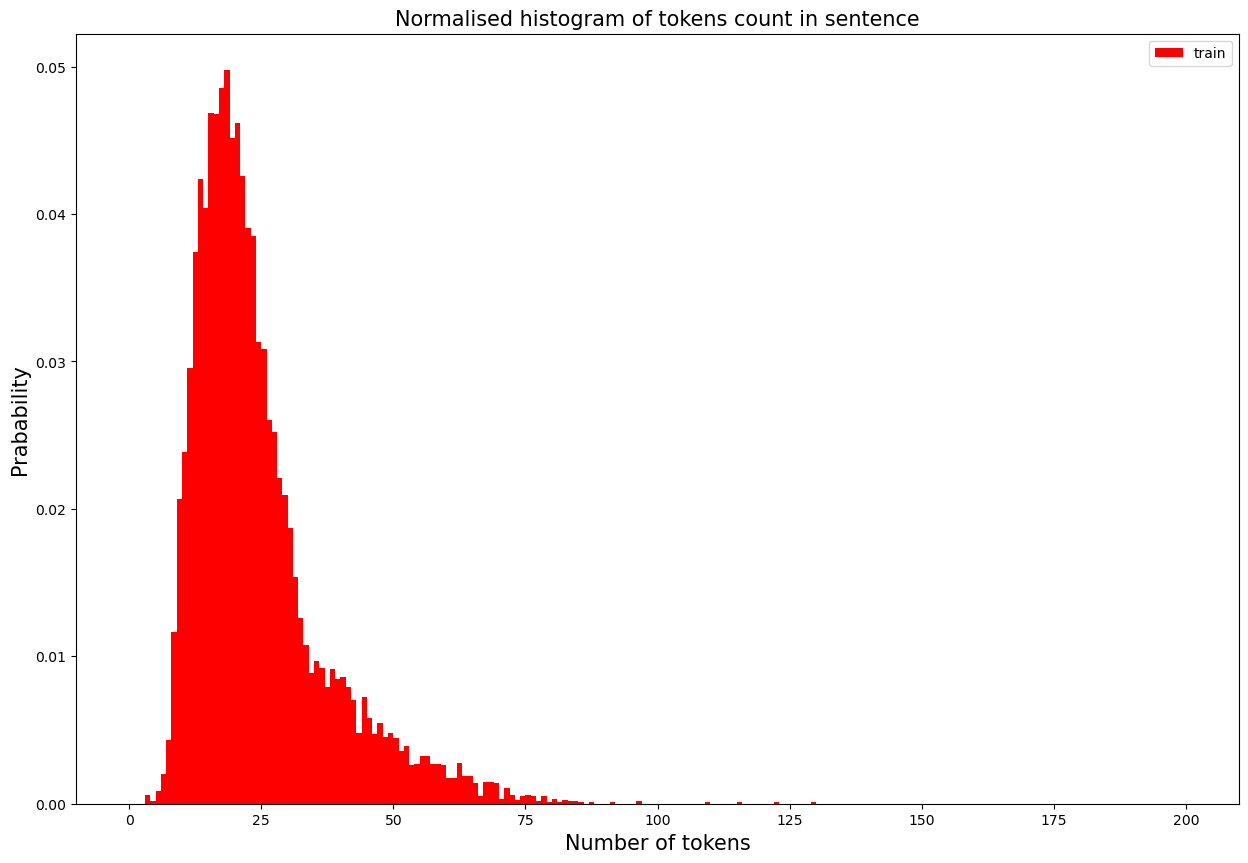

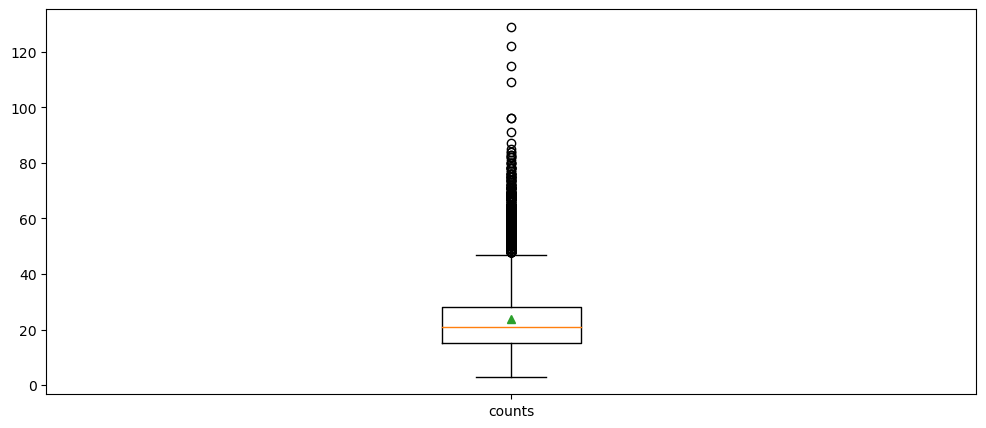

In [17]:
tokenizer = BertTokenizer.from_pretrained('bert-base-multilingual-uncased', do_lower_case=True)
# 대소문자 미구분 버트 다국어 토크나이저
train_bert_token_counts = train_set.apply(lambda x:len(tokenizer.tokenize(x)))

plt.figure(figsize=(15, 10))
plt.hist(train_bert_token_counts, bins=200, range=[0, 200], facecolor='r', density=True, label='train')
plt.title('Normalised histogram of tokens count in sentence', fontsize=15)
plt.legend()
plt.xlabel('Number of tokens', fontsize=15)
plt.ylabel('Prabability', fontsize=15)

print('문장 tokens 개수 최대 값: {}'.format(np.max(train_bert_token_counts)))
print('문장 tokens 개수 평균 값: {:.2f}'.format(np.mean(train_bert_token_counts)))
print('문장 tokens 개수 표준편차: {:.2f}'.format(np.std(train_bert_token_counts)))
print('문장 tokens 개수 중간 값: {}'.format(np.median(train_bert_token_counts)))
print('문장 tokens 개수 제 1 사분위: {}'.format(np.percentile(train_bert_token_counts, 25)))
print('문장 tokens 개수 제 3 사분위: {}'.format(np.percentile(train_bert_token_counts, 75)))
print('문장 tokens 개수 99 퍼센트: {}'.format(np.percentile(train_bert_token_counts, 99)))

plt.figure(figsize=(12, 5))
plt.boxplot(train_bert_token_counts,
             labels=['counts'],
             showmeans=True)

문장 tokens 개수 최대 값: 102
문장 tokens 개수 평균 값: 18.74
문장 tokens 개수 표준편차: 10.12
문장 tokens 개수 중간 값: 16.0
문장 tokens 개수 제 1 사분위: 12.0
문장 tokens 개수 제 3 사분위: 22.0
문장 tokens 개수 99 퍼센트: 53.0


{'whiskers': [<matplotlib.lines.Line2D at 0x1e88bed1a88>,
 'caps': [<matplotlib.lines.Line2D at 0x1e88bed6148>,
 'boxes': [<matplotlib.lines.Line2D at 0x1e88bed1488>],
 'medians': [<matplotlib.lines.Line2D at 0x1e88bed6c48>],
 'fliers': [<matplotlib.lines.Line2D at 0x1e88bed6388>],
 'means': [<matplotlib.lines.Line2D at 0x1e88bed6b08>]}

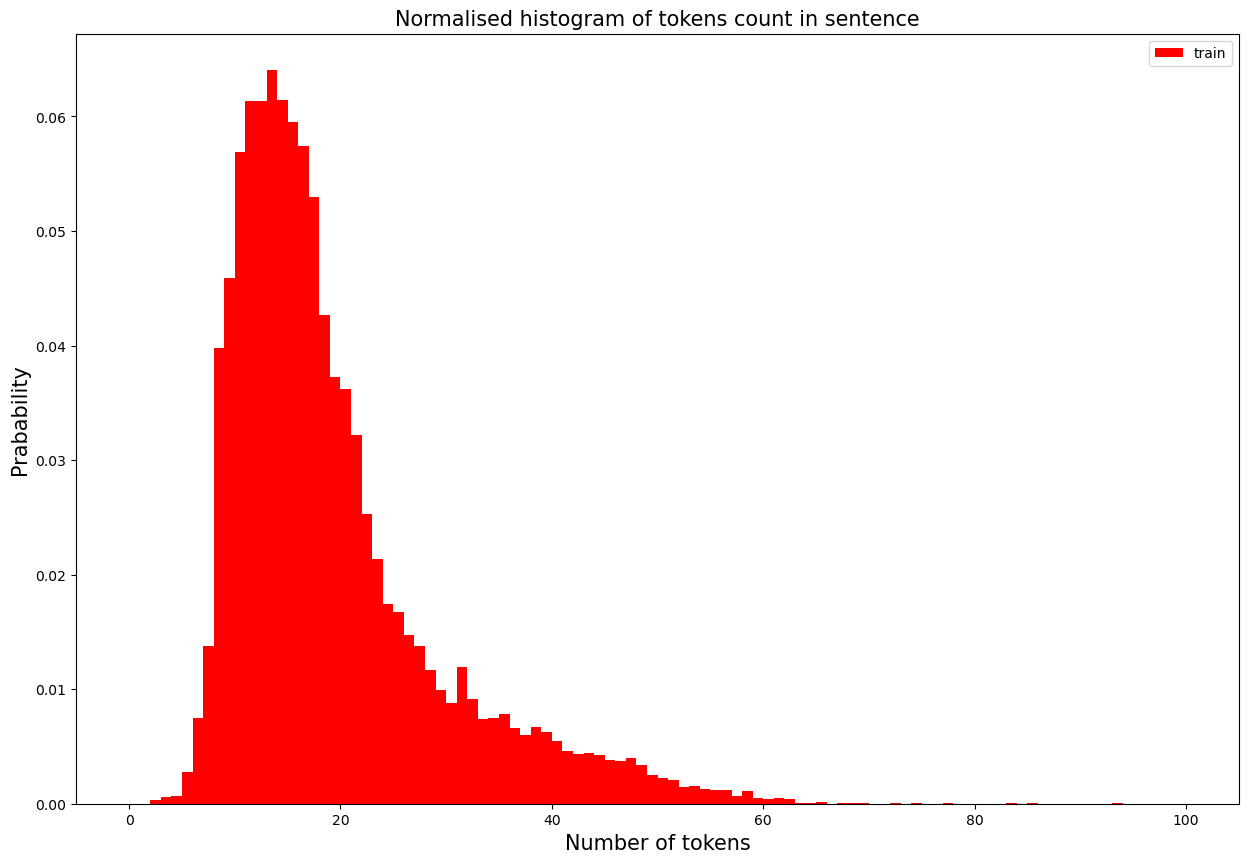

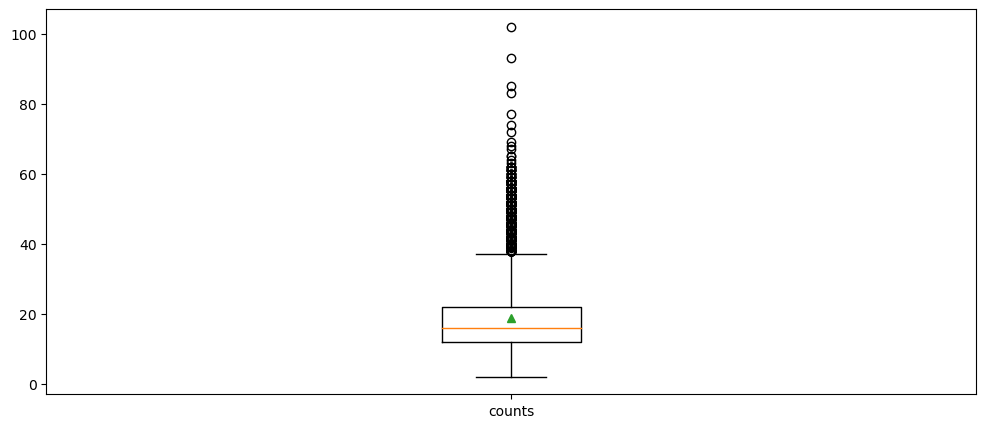

In [18]:
tokenizer = BertTokenizer.from_pretrained('bert-base-multilingual-cased', do_lower_case=False)
# 대소문자 구분 버트 토크나이저
train_bert_token_cased_counts = train_set.apply(lambda x:len(tokenizer.tokenize(x)))

plt.figure(figsize=(15, 10))
plt.hist(train_bert_token_cased_counts, bins=100, range=[0, 100], facecolor='r', density=True, label='train')
plt.title('Normalised histogram of tokens count in sentence', fontsize=15)
plt.legend()
plt.xlabel('Number of tokens', fontsize=15)
plt.ylabel('Prabability', fontsize=15)

print('문장 tokens 개수 최대 값: {}'.format(np.max(train_bert_token_cased_counts)))
print('문장 tokens 개수 평균 값: {:.2f}'.format(np.mean(train_bert_token_cased_counts)))
print('문장 tokens 개수 표준편차: {:.2f}'.format(np.std(train_bert_token_cased_counts)))
print('문장 tokens 개수 중간 값: {}'.format(np.median(train_bert_token_cased_counts)))
print('문장 tokens 개수 제 1 사분위: {}'.format(np.percentile(train_bert_token_cased_counts, 25)))
print('문장 tokens 개수 제 3 사분위: {}'.format(np.percentile(train_bert_token_cased_counts, 75)))
print('문장 tokens 개수 99 퍼센트: {}'.format(np.percentile(train_bert_token_cased_counts, 99)))

plt.figure(figsize=(12, 5))
plt.boxplot(train_bert_token_cased_counts,
             labels=['counts'],
             showmeans=True)

In [21]:
TOKENIZER_PATH = './gpt_ckpt/gpt2_kor_tokenizer.spiece'

tokenizer = SentencepieceTokenizer(TOKENIZER_PATH)

train_sentencepiece_counts = train_set.apply(lambda x: len(tokenizer(x)))

plt.figure(figsize=(15, 10))
plt.hist(train_sentencepiece_counts, bins=100, range=[0, 100], facecolor='r', density=True, label='train')
plt.title('Normalised histogram of tokens count in sentence', fontsize=15)
plt.legend()
plt.xlabel('Number of tokens', fontsize=15)
plt.ylabel('Prabability', fontsize=15)

print('문장 tokens 개수 최대 값: {}'.format(np.max(train_sentencepeice_counts)))
print('문장 tokens 개수 평균 값: {:.2f}'.format(np.mean(train_sentencepeice_counts)))
print('문장 tokens 개수 표준편차: {:.2f}'.format(np.std(train_sentencepeice_counts)))
print('문장 tokens 개수 중간 값: {}'.format(np.median(train_sentencepeice_counts)))
print('문장 tokens 개수 제 1 사분위: {}'.format(np.percentile(train_sentencepeice_counts, 25)))
print('문장 tokens 개수 제 3 사분위: {}'.format(np.percentile(train_sentencepeice_counts, 75)))
print('문장 tokens 개수 99 퍼센트: {}'.format(np.percentile(train_sentencepeice_counts, 99)))

plt.figure(figsize=(12, 5))
plt.boxplot(train_sentencepiece_counts,
             labels=['counts'],
             showmeans=True)

OSError: Not found: "./gpt_ckpt/gpt2_kor_tokenizer.spiece": No such file or directory Error #2

(-0.5, 799.5, 599.5, -0.5)

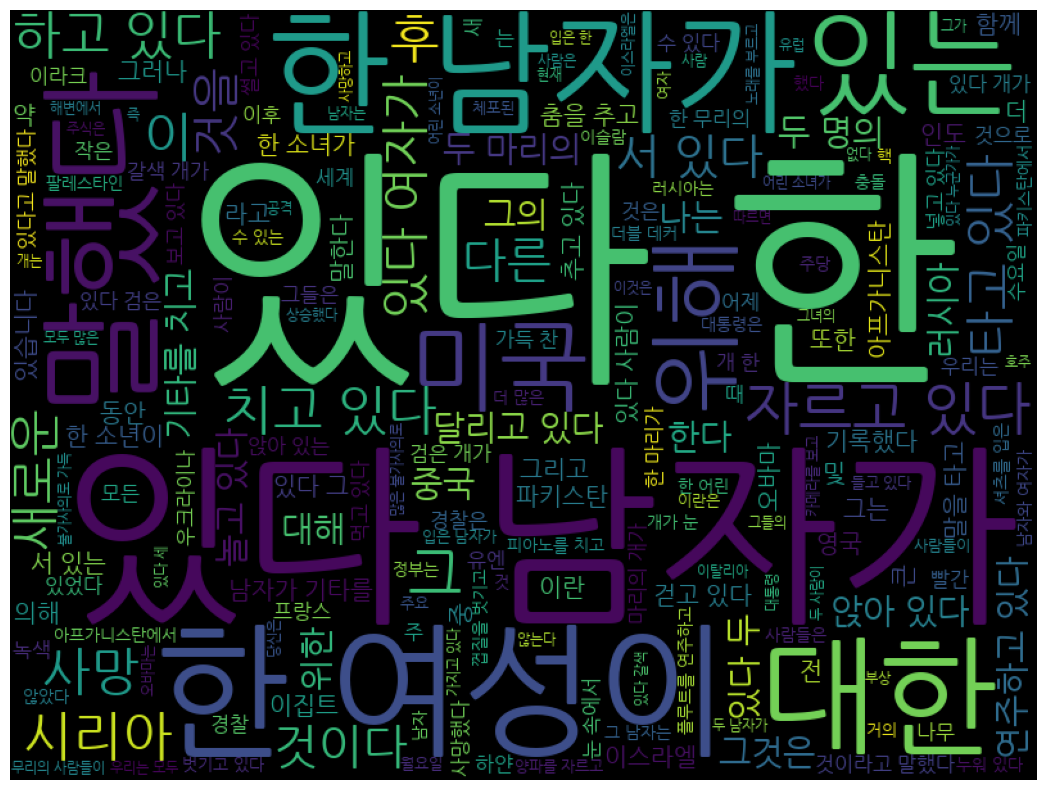

In [22]:
from wordcloud import WordCloud

font_path = os.path.join(DATA_IN_PATH, 'NanumGothic.ttf')
cloud = WordCloud(font_path = font_path, width=800, height=600).generate(" ".join(train_set.astype(str)))
plt.figure(figsize=(15,10))
plt.imshow(cloud)
plt.axis('off')

<AxesSubplot:>

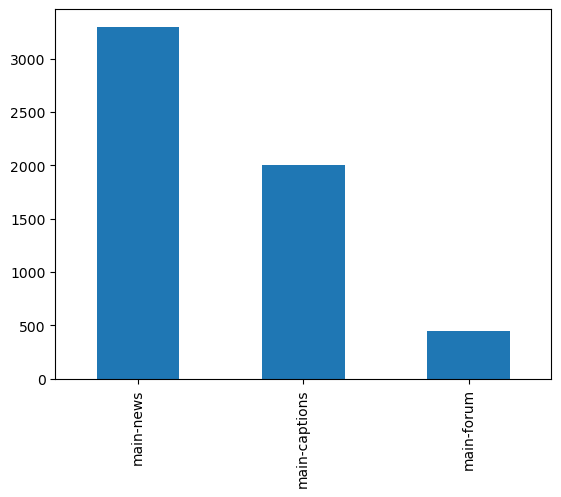

In [23]:
train_data.genre.value_counts().plot(kind='bar')

<AxesSubplot:>

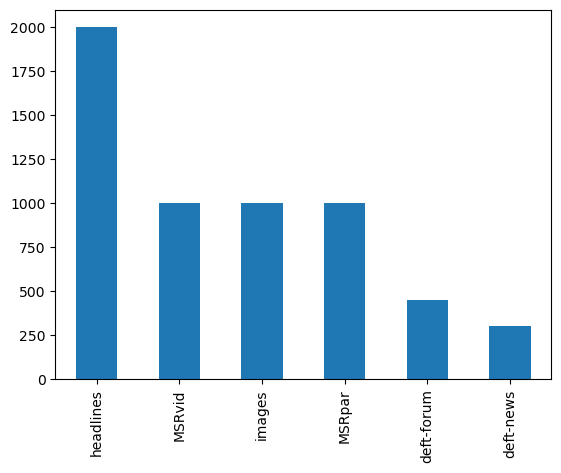

In [24]:
train_data.filename.value_counts().plot(kind='bar')

<AxesSubplot:>

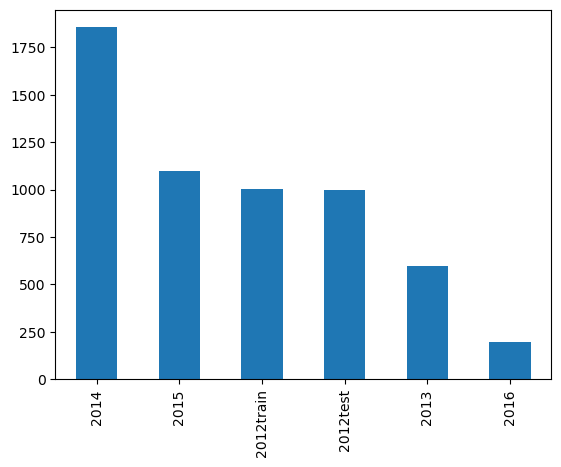

In [25]:
train_data.year.value_counts().plot(kind='bar')

<AxesSubplot:>

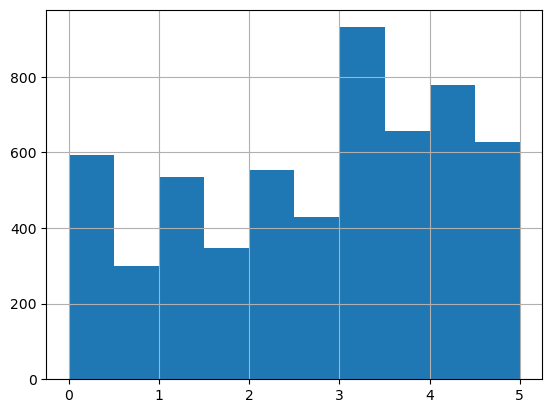

In [26]:
train_data.score.hist()